In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

*Do the following to load and look at the available Gaia table names:*

In [4]:
tables = Gaia.load_tables(only_names=True)
#for table in (tables):
    #print (table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [5]:
job = Gaia.launch_job_async("SELECT * \
FROM gaiaedr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',83.63305926163925,22.014497367986387),CIRCLE('ICRS',ra,dec,7.2))=1 \
AND phot_g_mean_mag<12 \
AND parallax > 0 \
AND parallax < 1 \
ORDER BY phot_g_mean_mag ASC;" \
, dump_to_file=True)

print (job)

Saving results to: 1631637801762O-result.vot.gz
Jobid: 1631637801762O
Phase: COMPLETED
Owner: None
Output file: 1631637801762O-result.vot.gz
Results: None


In [6]:
r = job.get_results()
print (r['source_id'])

     source_id     
-------------------
3374836252947269888
3429829048565502848
3427962936819149824
3399135872241463808
3404384322275638016
3428532105884757632
3423087908418163072
3401289987317420416
3424656293035086208
3397912493755048448
                ...
3401570495924502272
3427466571738523008
3422987023928957824
3441836776396687616
3390960934567294208
3424961338792736640
3403760997966587904
3407688659657942912
3423256163760072064
3424134948428337664
3415923726872418816
Length = 6304 rows


In [7]:
M_G= r['phot_g_mean_mag'] - 5*np.log10(100/r['parallax'])

bprp = np.array(r['bp_rp'])

In [150]:
bprpvalues = np.array([])
bprp_array = np.array([r['bp_rp']])

for i in np.arange(bprp_array[0,30]):
    if bprp_array[i]>=-1 or bprp_array[i]<=3:
        bprpvalues.append(bprp_array[i])



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

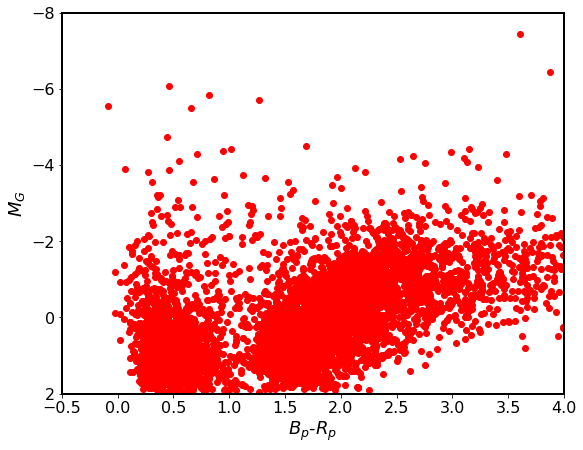

In [8]:
plt.figure(figsize=(9,7))
plt.scatter(bprp,M_G, color='r')
plt.ylim(2,-8)
plt.xlim(-0.5,4)
plt.xlabel('$B_{p}$-$R_{p}$',)
plt.ylabel('$M_{G}$')
plt.show()

In [169]:
get_col = lambda col: (line.split('\t')[col-1] for line in open('outputisochrones.dat'))

np.array('d',map(float,get_col(8)))



TypeError: Cannot interpret '<map object at 0x7f2700ab6910>' as a data type

In [137]:
job2 = Gaia.launch_job_async("SELECT * \
FROM gaiaedr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',83.63305926163925,22.014497367986387),CIRCLE('ICRS',ra,dec,7.2))=1 \
AND phot_g_mean_mag<11 \
AND parallax > 0 \
AND parallax < 1 \
ORDER BY phot_g_mean_mag ASC;" \
, dump_to_file=True)

print (job2)

Saving results to: 1631567193926O-result.vot.gz
Jobid: 1631567193926O
Phase: COMPLETED
Owner: None
Output file: 1631567193926O-result.vot.gz
Results: None


In [138]:
r2 = job2.get_results()
print (r2['source_id'])

M_G2= r2['phot_g_mean_mag'] - 5*np.log10(100/r2['parallax'])

bprp2 = r2['bp_rp']

     source_id     
-------------------
3374836252947269888
3429829048565502848
3427962936819149824
3399135872241463808
3404384322275638016
3428532105884757632
3423087908418163072
                ...
3423151199055781248
3397976643389071744
3397251511173077888
3422318353357327872
3442219651259205888
3424871827377673856
3415391086504501632
Length = 1777 rows


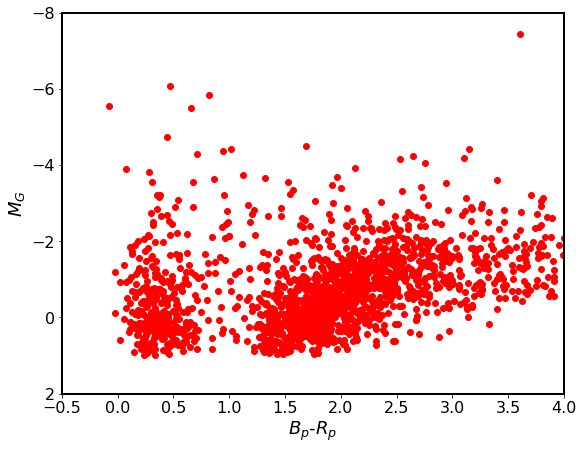

In [139]:
plt.figure(figsize=(9,7))
plt.scatter(bprp2,M_G2, color='r')
plt.ylim(2,-8)
plt.xlim(-0.5,4)
plt.xlabel('$B_{p}$-$R_{p}$',)
plt.ylabel('$M_{G}$')
plt.show()

*Again, inspect the output table and number of rows, and call the job 'm45cluster':*

In [11]:
m45cluster = job3.get_results() 
print (m45cluster['parallax']) 

     parallax     
    Angle[mas]    
------------------
7.4545648282310184
7.5239065408350996
6.9301093717323772
7.5788921365825894
 7.328286272889863
7.0233646883680159
8.1389671643305235
8.1445555234101779
7.3648468313130566
7.1694418609395765
               ...
7.2826513541337299
7.4681735932280162
 7.658985698496882
7.2023395286122085
8.2920957945484393
7.1461398221089798
7.8361028050064272
7.8762955633015945
 7.066701274479442
7.3330438493994405
Length = 106 rows


*Plot these new filtered results on the same plot as the previous search:*

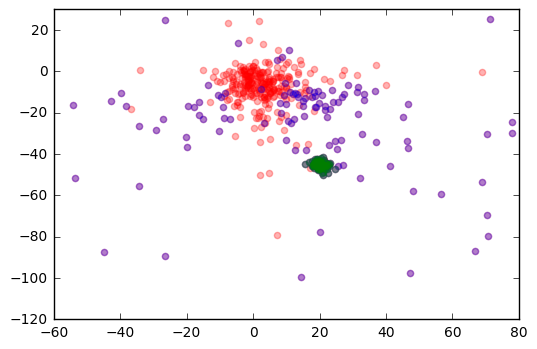

In [12]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.3)
plt.scatter(m45cluster['pmra'], m45cluster['pmdec'], color='g', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-120,30)

plt.show()

*Calculate the average parallax and standard deviation of the parallax for the M45 cluster candidates:*

In [13]:
avg_parallax = np.mean(m45cluster['parallax']) 
stddev_parallax = np.std(m45cluster['parallax']) 
print (avg_parallax, stddev_parallax)

7.4686695575 0.834822732559


*Now, we want to add information from other catalogues, in this example from 2MASS. To do this we make use of the pre-computed cross-matched tables provided in the Gaia archive.*

*We obtain the 2MASS photometric data by using the Gaia - 2MASS cross-matched best neighbour table (gaiadr1.tmass_best_neighbour) to identify the sources and the 2MASS original table (gaiadr1.tmass_original_valid) to retrieve the photometry:*

In [14]:
job4 = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source AS g, gaiadr1.tmass_best_neighbour AS tbest, gaiadr1.tmass_original_valid AS tmass \
WHERE g.source_id = tbest.source_id AND tbest.tmass_oid = tmass.tmass_oid \
AND CONTAINS(POINT('ICRS',g.ra,g.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
AND abs(g.pmra_error/g.pmra)<0.10 \
AND abs(g.pmdec_error/g.pmdec)<0.10 \
AND g.pmra IS NOT NULL AND abs(g.pmra)>0 \
AND g.pmdec IS NOT NULL AND abs(g.pmdec)>0 \
AND g.pmra BETWEEN 15 AND 25 \
AND g.pmdec BETWEEN -55 AND -40;", dump_to_file=False)

Launched query: 'SELECT * FROM gaiadr1.gaia_source AS g, gaiadr1.tmass_best_neighbour AS tbest, gaiadr1.tmass_original_valid AS tmass WHERE g.source_id = tbest.source_id AND tbest.tmass_oid = tmass.tmass_oid AND CONTAINS(POINT('ICRS',g.ra,g.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 AND abs(g.pmra_error/g.pmra)<0.10 AND abs(g.pmdec_error/g.pmdec)<0.10 AND g.pmra IS NOT NULL AND abs(g.pmra)>0 AND g.pmdec IS NOT NULL AND abs(g.pmdec)>0 AND g.pmra BETWEEN 15 AND 25 AND g.pmdec BETWEEN -55 AND -40;'
Retrieving async. results...
Query finished.


*Finally, confirm the output table has Gaia and 2MASS photometry and check the number of rows in the table:*

In [15]:
p = job4.get_results() 
print (p['phot_g_mean_mag', 'j_m', 'h_m', 'ks_m']) 

 phot_g_mean_mag        j_m            h_m            ks_m     
  Magnitude[mag]   Magnitude[mag] Magnitude[mag] Magnitude[mag]
------------------ -------------- -------------- --------------
10.757800849005008      9.6029997      9.2019997      9.0939999
6.0733019438444877      5.9679999      6.0510001      5.9759998
10.643169127592188      9.5349998      9.2189999      9.1370001
6.8275023878511796      6.6989999      6.7329998      6.6919999
 10.15654586177056      9.1169996          8.868      8.7580004
7.5371472521505787      7.2800002           7.29          7.257
8.1328652600027205      7.5879998      7.5279999      7.4699998
8.5268119167756886      7.8920002      7.7670002      7.7379999
9.0234235063721506      8.2360001          8.033      8.0019999
7.0246160054011426          6.848      6.9200001          6.895
               ...            ...            ...            ...
10.511033521483427      9.4770002      9.1400003      9.0719995
11.597470392962894         10.261       

All of the above has been performed as an anonymous user to the Gaia archive. To log in to the archive, keep and share your results, see the following instructions: http://astroquery.readthedocs.io/en/latest/gaia/gaia.html#authenticated-access

**Additional information**

*The above query to obtain the 2MASS catalogue data can also be performed by using an 'INNER JOIN' in the ADQL query. For example:*

In [16]:
job5 = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source \
INNER JOIN gaiadr1.tmass_best_neighbour ON gaiadr1.gaia_source.source_id = gaiadr1.tmass_best_neighbour.source_id \
INNER JOIN gaiadr1.tmass_original_valid ON gaiadr1.tmass_original_valid.tmass_oid = gaiadr1.tmass_best_neighbour.tmass_oid \
WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0 \
AND pmra BETWEEN 15 AND 25 \
AND pmdec BETWEEN -55 AND -40;", dump_to_file=False)

Launched query: 'SELECT * FROM gaiadr1.gaia_source INNER JOIN gaiadr1.tmass_best_neighbour ON gaiadr1.gaia_source.source_id = gaiadr1.tmass_best_neighbour.source_id INNER JOIN gaiadr1.tmass_original_valid ON gaiadr1.tmass_original_valid.tmass_oid = gaiadr1.tmass_best_neighbour.tmass_oid WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 AND abs(pmra_error/pmra)<0.10 AND abs(pmdec_error/pmdec)<0.10 AND pmra IS NOT NULL AND abs(pmra)>0 AND pmdec IS NOT NULL AND abs(pmdec)>0 AND pmra BETWEEN 15 AND 25 AND pmdec BETWEEN -55 AND -40;'
Retrieving async. results...
Query finished.


*Confirm the output table has Gaia and 2MASS photometry and check the number of rows in the table is the same as above (106 rows):*

In [17]:
test = job5.get_results() 
print (test['phot_g_mean_mag', 'j_m', 'h_m', 'ks_m']) 

 phot_g_mean_mag        j_m            h_m            ks_m     
  Magnitude[mag]   Magnitude[mag] Magnitude[mag] Magnitude[mag]
------------------ -------------- -------------- --------------
10.757800849005008      9.6029997      9.2019997      9.0939999
6.0733019438444877      5.9679999      6.0510001      5.9759998
10.643169127592188      9.5349998      9.2189999      9.1370001
6.8275023878511796      6.6989999      6.7329998      6.6919999
 10.15654586177056      9.1169996          8.868      8.7580004
7.5371472521505787      7.2800002           7.29          7.257
8.1328652600027205      7.5879998      7.5279999      7.4699998
8.5268119167756886      7.8920002      7.7670002      7.7379999
9.0234235063721506      8.2360001          8.033      8.0019999
7.0246160054011426          6.848      6.9200001          6.895
               ...            ...            ...            ...
10.511033521483427      9.4770002      9.1400003      9.0719995
11.597470392962894         10.261       

*Visually inspect the results are the same by plotting the same as above:* 

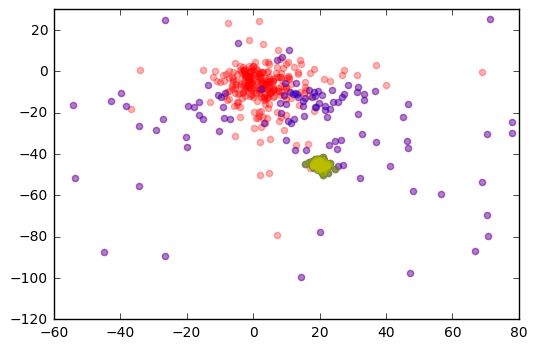

In [18]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.3)
plt.scatter(m45cluster['pmra'], m45cluster['pmdec'], color='g', alpha=0.3)
plt.scatter(test['pmra'], test['pmdec'], color='y', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-120,30)

plt.show()